<a href="https://colab.research.google.com/github/nirmalaselvaraj963-sys/ml-work/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os, shutil
from sklearn.model_selection import train_test_split


In [7]:
from google.colab import files
uploaded = files.upload()  # choose your cats_and_dogs.zip


Saving archive (13) (1) (1).zip to archive (13) (1) (1).zip


In [27]:
import zipfile, os

zip_path = "/content/archive (13) (1) (2).zip"   # your uploaded file
extract_path = "/content/data"               # where to unzip

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['cats_set', 'dogs_set']


In [29]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen  = ImageDataGenerator(rescale=1./255)


In [31]:
train_data = train_datagen.flow_from_directory(
    directory=extract_path,      # ✅ must pass this
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

Found 800 images belonging to 2 classes.


In [33]:
val_data = train_datagen.flow_from_directory(
    directory=extract_path,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 200 images belonging to 2 classes.


In [34]:
test_data = test_datagen.flow_from_directory(
    directory=extract_path,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary"
)

Found 1000 images belonging to 2 classes.


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # binary classification (cat vs dog)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4588 - loss: 0.9893 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4845 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5184 - loss: 0.6906 - val_accuracy: 0.4550 - val_loss: 0.6992
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5032 - loss: 0.7022 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6063 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5820 - loss: 0.6806 - val_accuracy: 0.5950 - val_loss: 0.6751
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6025 - loss: 0.6659 - val_accuracy: 0.5550 - val_loss: 0.6887
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6417 - loss: 0.6368 - val_accuracy: 0.5950 - val_loss:

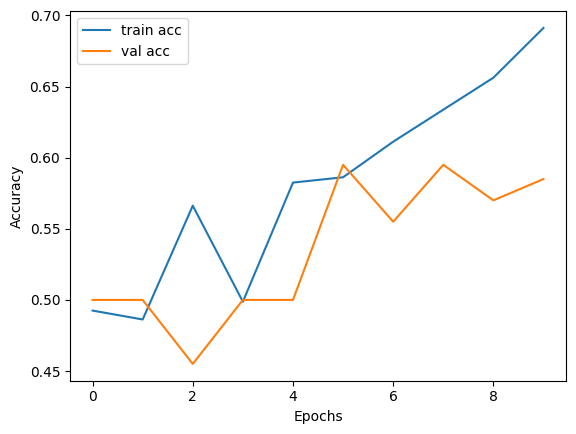

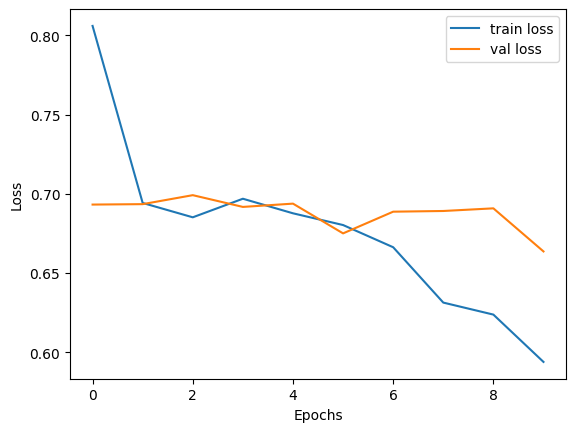

In [37]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [38]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.7174 - loss: 0.5600
Test Accuracy: 0.7049999833106995


In [43]:
from google.colab import files
uploaded = files.upload()   # choose a cat or dog image from your computer


Saving dog.jfif to dog (1).jfif


In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image

# change filename if different
img_path = list(uploaded.keys())[0]

# Load image and resize
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # batch of 1

# Predict
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🐶 This looks like a DOG")
else:
    print("🐱 This looks like a CAT")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
🐶 This looks like a DOG
